# Análisis Exploratorio (EDA)-Data a Posteriori (Extraída de informes publicados por YouTube)

In [1]:
!pip install statsmodels
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

sns.set()


In [3]:
df_dataset = pd.read_excel('/work/Delcavideograpghy_Consolidado.xlsx')

# EDA datos_tabla

## df_data_tabla_area_geogr 

In [4]:
df_data_tabla_area_geogr = df_dataset[['area_geografica_AG', 'cnt_vis_AG'
                ,'tiempo_vis_AG', 'duarcion_media_vis_AG', 'nombre_video', 'fecha_publicacion']]
df_data_tabla_area_geogr = df_data_tabla_area_geogr.dropna()

########### Rename ###########
df_data_tabla_area_geogr.rename(columns = {'area_geografica_AG': 'area_geografica', 'cnt_vis_AG':'visualizaciones', 
                'tiempo_vis_AG': 'tiempo_de_visualizacion_(horas)', 
                'duarcion_media_vis_AG':'duracion_media_de_las_visualizaciones'}, inplace = True)
df_data_tabla_area_geogr.head().round(3)

,area_geografica,visualizaciones,tiempo_de_visualizacion_(horas),duracion_media_de_las_visualizaciones,nombre_video,fecha_publicacion
1,AR,11.0,0.062,0:00:20,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
26,MX,38.0,0.346,0:00:32,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
39,Total,625.0,6.326,0:00:36,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
194,AR,74.0,3.489,0:02:49,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
199,CO,119.0,5.214,0:02:37,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902


In [5]:
df_data_tabla_area_geogr.describe().round(3)

,visualizaciones,tiempo_de_visualizacion_(horas),fecha_publicacion
count,906.000,906.000,9.060000e+02
mean,747.836,32.833,2.021405e+07
std,5524.534,208.308,4.409851e+03
min,10.000,0.011,2.021050e+07
25%,21.250,0.708,2.021083e+07
50%,60.000,2.718,2.021112e+07
75%,226.750,10.084,2.022020e+07
max,151522.000,5615.867,2.022043e+07


Nota aclaratoria: En los diferentes informes ofrecidos por Youtube se presenta mucha información repetida, por tal razón en el Análisis Exploratorio de Datos de los datos a posteriori es posible ver nuevamente resultados ya observados.

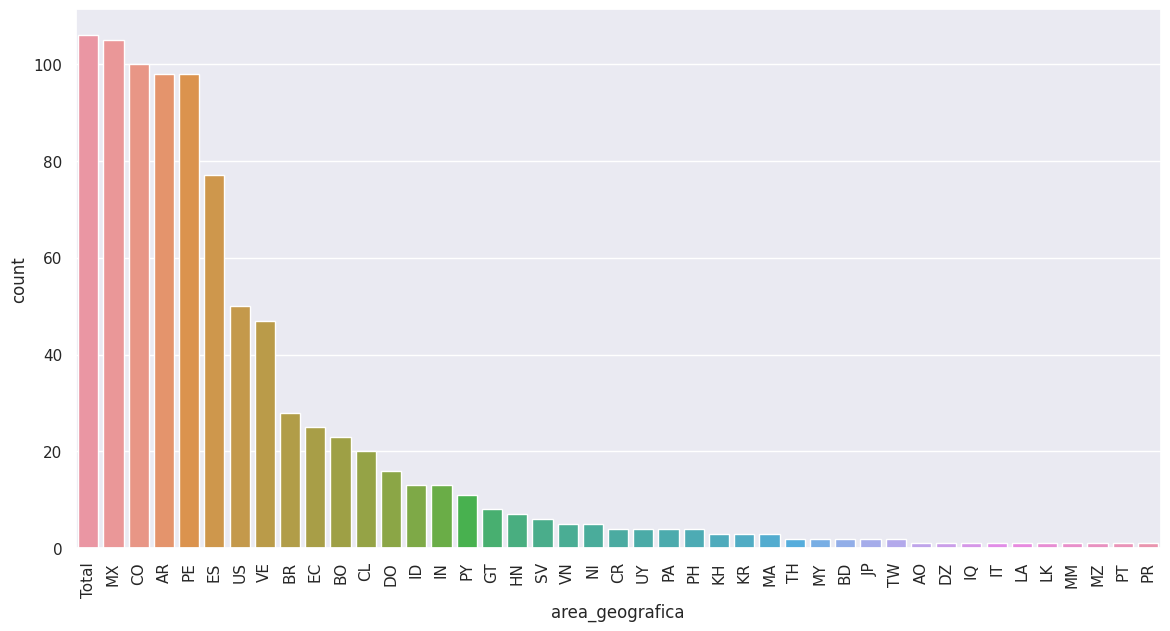

In [6]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x = 'area_geografica', data = df_data_tabla_area_geogr, 
order = df_data_tabla_area_geogr['area_geografica'].value_counts().index)
plt.xticks(rotation=90);

Según la data obtenida a posteriori, los países  donde mayor cantidad de visualizaciones tiene el canal son México, Colombia y Argentina. Así mismo se observa en la siguiente matriz de correlaciones que el tiempo de visualización y las visualizaciones son directamente proporcionales. No es un resultado sorprendente pero se controla que este sea el comportamiento.

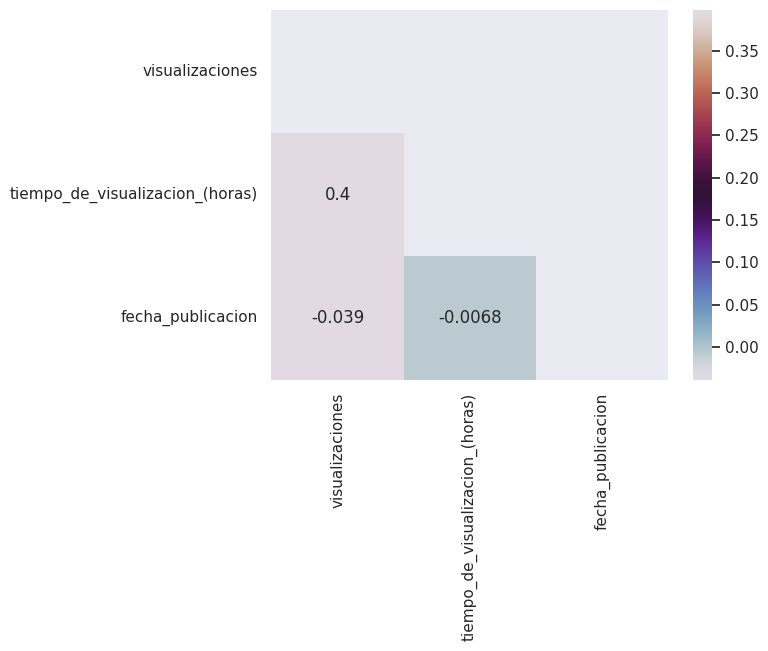

In [83]:
corr_df = df_data_tabla_area_geogr.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',square=False, alpha=1, mask=mask)

plt.show()

Para los casos en los cuales el tiempo de visualización superan las 200 horas, se asumen como datos atípicos

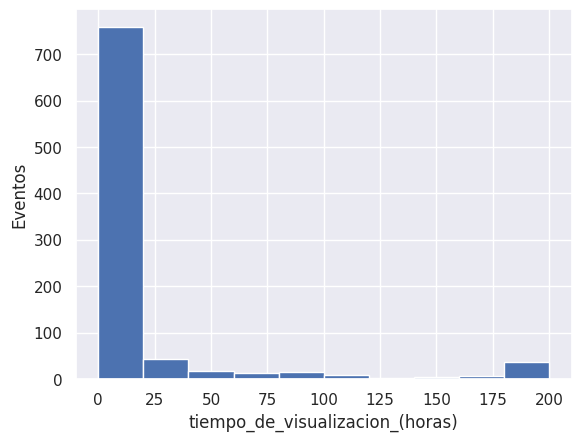

In [ ]:
df_data_tabla_area_geogr['tiempo_de_visualizacion_(horas)'][df_data_tabla_area_geogr['tiempo_de_visualizacion_(horas)']>200]=200
plt.hist(df_data_tabla_area_geogr['tiempo_de_visualizacion_(horas)'],bins=10)
plt.xlabel("tiempo_de_visualizacion_(horas)")
plt.ylabel("Eventos")
plt.show()

Se observa como el tiempo de visualización de los videos de las 906 observaciones por lo general no supera las 25 horas. Acá es importante mencionar que se tienen 906 observaciones ya que se cuenta con datos a posteriori de los diferentes videos en distintos periodos de tiempo.

## df_data_tabla_ciudades

In [11]:
df_data_tabla_ciudades = df_dataset[['nombre_de_la_ciudad_NC', 'cnt_vis_NC', 'tiempo_vis_NC', 'duarcion_media_vis_NC'
                        , 'nombre_video', 'fecha_publicacion']]
df_data_tabla_ciudades = df_data_tabla_ciudades.dropna()

########### Rename ###########
df_data_tabla_ciudades.rename(columns = {'nombre_de_la_ciudad_NC':'nombre_de_la_ciudad', 'cnt_vis_NC':'visualizaciones', 
                'tiempo_vis_NC':'tiempo_de_visualizacion_(horas)', 
                'duarcion_media_vis_NC':'duracion_media_de_las_visualizaciones'}, inplace = True)
df_data_tabla_ciudades.head().round(3)

,nombre_de_la_ciudad,visualizaciones,tiempo_de_visualizacion_(horas),duracion_media_de_las_visualizaciones,nombre_video,fecha_publicacion
224,Bogotá,12.0,0.817,0:04:05,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
245,Ciudad de México,16.0,0.880,0:03:18,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
294,Lima,17.0,0.741,0:02:36,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
803,Bogotá,25.0,1.561,0:03:44,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427
824,Ciudad de México,12.0,0.572,0:02:51,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427


In [12]:
df_data_tabla_ciudades.describe().round(3)

,visualizaciones,tiempo_de_visualizacion_(horas),fecha_publicacion
count,373.000,373.000,3.730000e+02
mean,159.542,5.536,2.021407e+07
std,613.988,25.010,4.298885e+03
min,10.000,0.011,2.021050e+07
25%,15.000,0.461,2.021112e+07
50%,31.000,1.220,2.021112e+07
75%,74.000,3.288,2.022012e+07
max,8245.000,432.873,2.022043e+07


## df_data_tabla_contenido

In [16]:
df_dataset_priori = pd.read_excel('/work/Delcavideograpghy_Consolidado_priori.xlsx')

df_data_tabla_contenido = df_dataset_priori[['visualizaciones', 'tiempo_de_visualizacion_(horas)', 'suscriptores', 'tus_ingresos_estimados_(usd)'
        , 'impresiones', 'porcentaje_de_clics_de_las_impresiones_(%)', 'fecha_publicacion', 'nombre_video' ]]

In [17]:
#df_data_tabla_contenido = pd.read_csv('/work/data_consolidada/datos_tabla/df_data_tabla_contenido.csv')
df_data_tabla_contenido.head()

,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),fecha_publicacion,nombre_video
0,1322,55.4837,1,1.359,62872,0.87,20210902,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶
1,2344,95.3512,5,2.184,33250,4.18,20210601,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...
2,3078,390.6325,35,7.989,57793,2.98,20210525,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...
3,5283,225.6908,15,5.929,65191,4.37,20220427,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...
4,3034,200.6775,15,5.123,82848,1.88,20211019,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...


In [18]:
df_data_tabla_contenido.describe().round(3)

,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),fecha_publicacion
count,124.000,124.000,124.000,124.000,124.000,124.000,1.240000e+02
mean,4775.637,233.522,45.081,5.819,137854.871,2.208,2.021395e+07
std,14331.112,545.532,202.981,12.386,708660.343,1.529,4.591703e+03
min,383.000,4.219,-4.000,0.097,12604.000,0.710,2.021022e+07
25%,1285.000,59.298,2.000,1.749,31736.750,1.248,2.021063e+07
50%,1812.500,113.703,7.000,2.944,54910.500,1.705,2.021100e+07
75%,3428.500,234.032,20.750,5.164,81119.500,2.590,2.022022e+07
max,151522.000,5615.865,2090.000,120.952,7914266.000,11.060,2.022083e+07


Tal y como se mencionó en el análisis exploratorio de datos a priori, los usuarios han parecido mostrar mayor interés en los videos cuya temática es Corel Draw. Acá se observa como el video con más horas de visualización está asociado a dicha temática

In [ ]:
DeepnoteChart(df_data_tabla_contenido, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"nombre_video","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"tus_ingresos_estimados_(usd)","scale":{"type":"linear"},"aggregate":"sum"}}}""")

Se observa en el análisis de correlaciones de la tabla con los contenidos que la variable 'Visualizaciones' presenta una correlación muy alta con las variables suscriptores, ingresos estimados e impresiones. A su vez la variable impresiones tiene correlación alta con los ingreoss estimados, lo cual es normal dentro del contecto que se está trabajando.

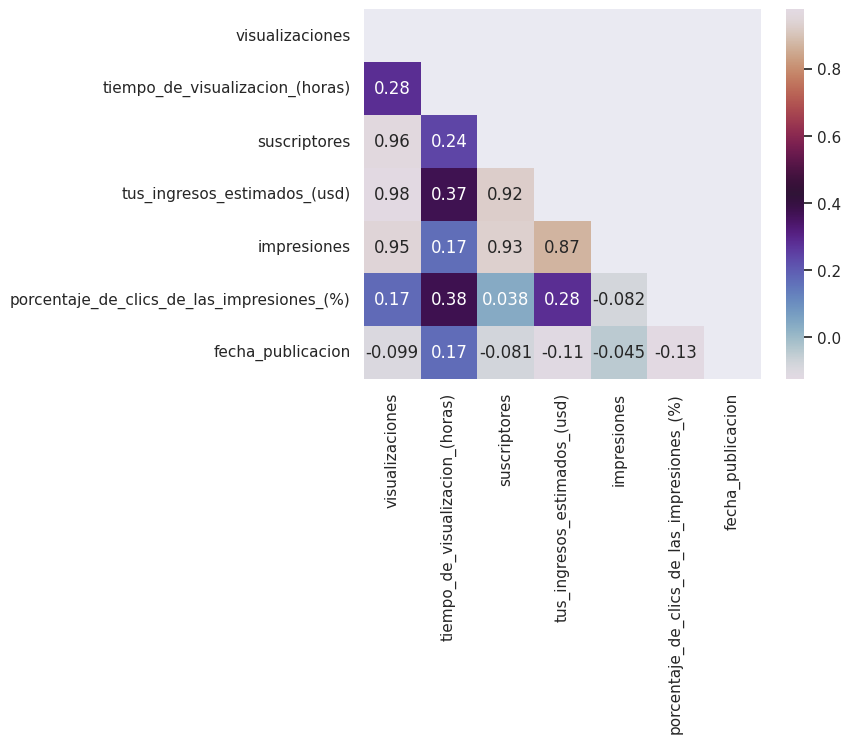

In [82]:
corr_df=df_data_tabla_contenido.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',square=False, alpha=1, mask=mask)
plt.show()

Podemos ver como los ingresos estimados de los videos se concentran en valores bajos aún. Lo anterior da mayor importancia al trabajo realizado con las variables a priori, el cual busca incrementar el éxito del canal y por ende los ingresos del mismo.

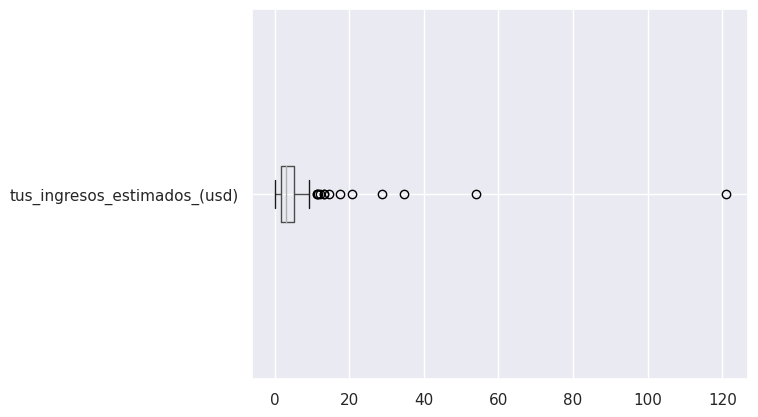

In [84]:
df_data_tabla_contenido['tiempo_de_visualizacion_(horas)'][df_data_tabla_contenido['tiempo_de_visualizacion_(horas)']>=200]=200
boxplot=df_data_tabla_contenido.boxplot(column=['tus_ingresos_estimados_(usd)'],rot=0,vert=False)
boxplot.plot
plt.show()

## df_data_tabla_edad_espect

In [24]:
df_data_tabla_edad_espect = df_dataset[['rango_edad', 'visualizaciones_(%)Edad', 'duarcion_media_vis_edad'
                , 'tiempo_vis_(%)Edad', 'nombre_video', 'fecha_publicacion']]
df_data_tabla_edad_espect = df_data_tabla_edad_espect.dropna()

########### Rename ###########
df_data_tabla_edad_espect.rename(columns = {'rango_edad':'edad_del_espectador', 'duarcion_media_vis_edad':'duracion_media_de_las_visualizaciones'
                , 'visualizaciones_(%)Edad':'visualizaciones_(%)'
                , 'tiempo_vis_(%)Edad':'tiempo_de_visualizacion_(horas)_(%)'}, inplace = True)

df_data_tabla_edad_espect.head()

,edad_del_espectador,visualizaciones_(%),duracion_media_de_las_visualizaciones,tiempo_de_visualizacion_(horas)_(%),nombre_video,fecha_publicacion
196,Entre 35 y 44 años,100.00,0:03:30,100.00,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
581,Entre 25 y 34 años,42.86,0:07:13,35.83,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525
582,Entre 35 y 44 años,57.14,0:09:41,64.17,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525
774,Entre 25 y 34 años,18.94,0:03:05,16.25,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427
775,Entre 35 y 44 años,33.33,0:03:49,35.46,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427


In [25]:
df_data_tabla_edad_espect.describe()

,visualizaciones_(%),tiempo_de_visualizacion_(horas)_(%),fecha_publicacion
count,180.000000,180.000000,1.800000e+02
mean,41.666778,41.667000,2.021426e+07
std,26.100798,26.509178,4.468459e+03
min,0.640000,0.500000,2.021050e+07
25%,24.945000,25.122500,2.021091e+07
50%,35.690000,35.275000,2.021112e+07
75%,47.735000,49.500000,2.022020e+07
max,100.000000,100.000000,2.022043e+07


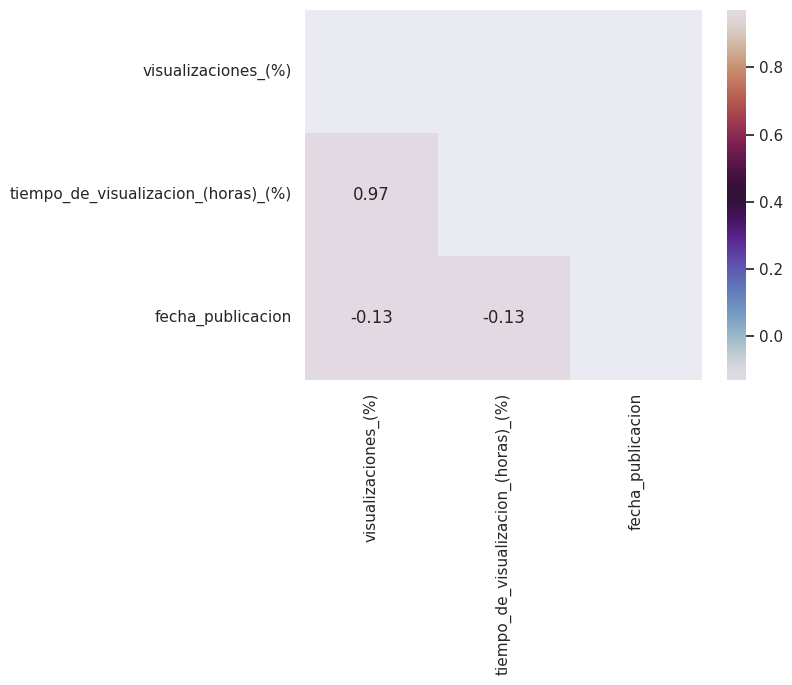

In [85]:
corr_df=df_data_tabla_edad_espect.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',square=False, alpha=1, mask=mask)
plt.show()


Según los datos obtenidos, los usuarios de la plataforma que más observan los videos son los aquellos que tienen entre 35 y 4 años de edad y los que menos lo observan son los menores de edad.

<AxesSubplot: xlabel='edad_del_espectador', ylabel='count'>

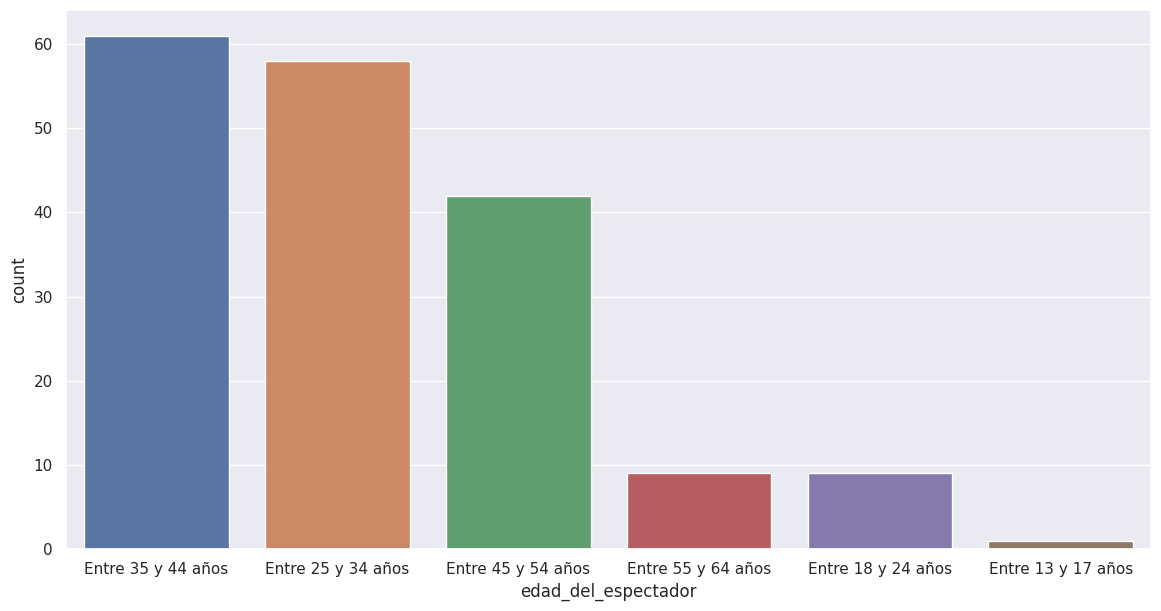

In [27]:
fig,ax=plt.subplots(figsize=(14,7))
sns.countplot(x='edad_del_espectador',data=df_data_tabla_edad_espect,
order=df_data_tabla_edad_espect['edad_del_espectador'].value_counts().index)

## df_data_tabla_estado_suscripcion

In [28]:
df_data_tabla_estado_suscripcion = df_dataset[['estado_de_suscripcion_ES', 'cnt_vis_ES', 'tiempo_vis_ES'
                        , 'duarcion_media_vis_ES', 'nombre_video', 'fecha_publicacion']]
df_data_tabla_estado_suscripcion = df_data_tabla_estado_suscripcion.dropna()

########### Rename ###########
df_data_tabla_estado_suscripcion.rename(columns = {'estado_de_suscripcion_ES':'estado_de_suscripcion', 'cnt_vis_ES':'visualizaciones', 
                'tiempo_vis_ES':'tiempo_de_visualizacion_(horas)', 
                'duarcion_media_vis_ES':'duracion_media_de_las_visualizaciones'}, inplace = True)
df_data_tabla_estado_suscripcion.head()


,estado_de_suscripcion,visualizaciones,tiempo_de_visualizacion_(horas),duracion_media_de_las_visualizaciones,nombre_video,fecha_publicacion
0,No suscrito,306.0,2.7064,0:00:31,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
1,Suscrito,319.0,3.6194,0:00:40,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
2,Total,625.0,6.3257,0:00:36,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
193,No suscrito,276.0,11.1191,0:02:25,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
194,Suscrito,1046.0,44.3647,0:02:32,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902


In [29]:
df_data_tabla_estado_suscripcion.describe()

,visualizaciones,tiempo_de_visualizacion_(horas),fecha_publicacion
count,315.000000,315.000000,3.150000e+02
mean,2743.238095,126.076197,2.021328e+07
std,12193.591977,444.098615,4.122880e+03
min,58.000000,0.423000,2.021050e+07
25%,586.000000,11.987200,2.021073e+07
50%,1088.000000,47.155200,2.021093e+07
75%,1819.000000,114.648000,2.022012e+07
max,151522.000000,5615.866600,2.022043e+07


Podemos observar como el mayor tiempo de visualización del canal es por parte de los usuarios que no están inscritos en el mismo. No obstante lo anterior, lo que se debe buscar según las recomendaciones de la plataforma es ampliar la base de suscriptores para facilitar la recomendación de videos.

In [88]:
DeepnoteChart(df_data_tabla_estado_suscripcion, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"estado_de_suscripcion","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"tiempo_de_visualizacion_(horas)","scale":{"type":"linear"},"aggregate":"sum"}}}""")

## df_data_tabla_fecha

In [33]:
df_data_tabla_fecha = pd.read_csv('/work/data_consolidada/datos_tabla/df_data_tabla_fecha.csv')
df_data_tabla_fecha.head()
#

,fecha,visualizaciones,tiempo_de_visualizacion_(horas),duracion_media_de_las_visualizaciones,tus_ingresos_estimados_(usd),fecha_publicacion,nombre_video
0,Total,13062.0,589.1126,0:02:42,12.261,20220118,🤯 APRENDE a DISEÑAR LOGOS con ESTA TÉCNICA S...
1,2022-10-11,2.0,0.2711,0:08:07,0.000,20220118,🤯 APRENDE a DISEÑAR LOGOS con ESTA TÉCNICA S...
2,2022-10-09,1.0,0.0087,0:00:31,0.002,20220118,🤯 APRENDE a DISEÑAR LOGOS con ESTA TÉCNICA S...
3,2022-10-06,3.0,0.1516,0:03:01,0.000,20220118,🤯 APRENDE a DISEÑAR LOGOS con ESTA TÉCNICA S...
4,2022-10-05,2.0,0.2383,0:07:08,0.001,20220118,🤯 APRENDE a DISEÑAR LOGOS con ESTA TÉCNICA S...


In [34]:
df_data_tabla_fecha.describe().round(3)

,visualizaciones,tiempo_de_visualizacion_(horas),tus_ingresos_estimados_(usd),fecha_publicacion
count,9927.000,9927.000,9942.000,9.942000e+03
mean,56.501,2.541,0.059,2.021413e+07
std,1554.705,58.716,1.270,4.314975e+03
min,0.000,0.000,0.000,2.021052e+07
25%,1.000,0.022,0.000,2.021103e+07
50%,3.000,0.157,0.002,2.021113e+07
75%,7.000,0.494,0.008,2.022013e+07
max,151522.000,5615.867,120.952,2.022030e+07


## df_data_tabla_fuente_trafico

In [35]:
df_data_tabla_fuente_trafico = df_dataset[['fuente_de_trafico_FT', 'cnt_vis_FT', 
                'tiempo_vis_FT', 'duarcion_media_vis_FT', 'impresiones_FT','porcentaje_clics_de_impr_FT'
                , 'nombre_video', 'fecha_publicacion']]
df_data_tabla_fuente_trafico = df_data_tabla_fuente_trafico.dropna()

########### Rename ###########
df_data_tabla_fuente_trafico.rename(columns = {'fuente_de_trafico_FT':'fuente_de_trafico', 'cnt_vis_FT':'visualizaciones', 
                'tiempo_vis_FT':'tiempo_de_visualizacion_(horas)', 
                'duarcion_media_vis_FT':'duracion_media_de_las_visualizaciones', 'impresiones_FT':'impresiones'
                ,'porcentaje_clics_de_impr_FT': 'porcentaje_de_clics_de_las_impresiones_(%)'}, inplace = True)

df_data_tabla_fuente_trafico.head()
#

,fuente_de_trafico,visualizaciones,tiempo_de_visualizacion_(horas),duracion_media_de_las_visualizaciones,impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video,fecha_publicacion
0,Búsqueda de YouTube,126.0,1.2026,0:00:34,2752.0,2.51,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
4,Funciones de exploración,138.0,1.6435,0:00:42,4442.0,1.40,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
5,Listas de reproducción,24.0,0.1855,0:00:27,187.0,8.56,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
10,Página de lista de reproducción,6.0,0.0891,0:00:53,176.0,3.41,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
11,Páginas de canal,90.0,0.8862,0:00:35,4049.0,0.89,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722


In [36]:
df_data_tabla_fuente_trafico.describe().round(3)

,visualizaciones,tiempo_de_visualizacion_(horas),impresiones,porcentaje_de_clics_de_las_impresiones_(%),fecha_publicacion
count,735.000,735.000,735.000,735.000,7.350000e+02
mean,1096.486,50.214,41449.473,2.180,2.021335e+07
std,7678.383,266.342,404739.310,1.993,4.154778e+03
min,1.000,0.000,8.000,0.000,2.021050e+07
25%,34.000,1.200,1332.000,1.090,2.021073e+07
50%,134.000,5.310,5439.000,1.580,2.021093e+07
75%,625.000,28.208,15555.000,2.670,2.022012e+07
max,151522.000,5615.867,7914266.000,18.390,2.022043e+07


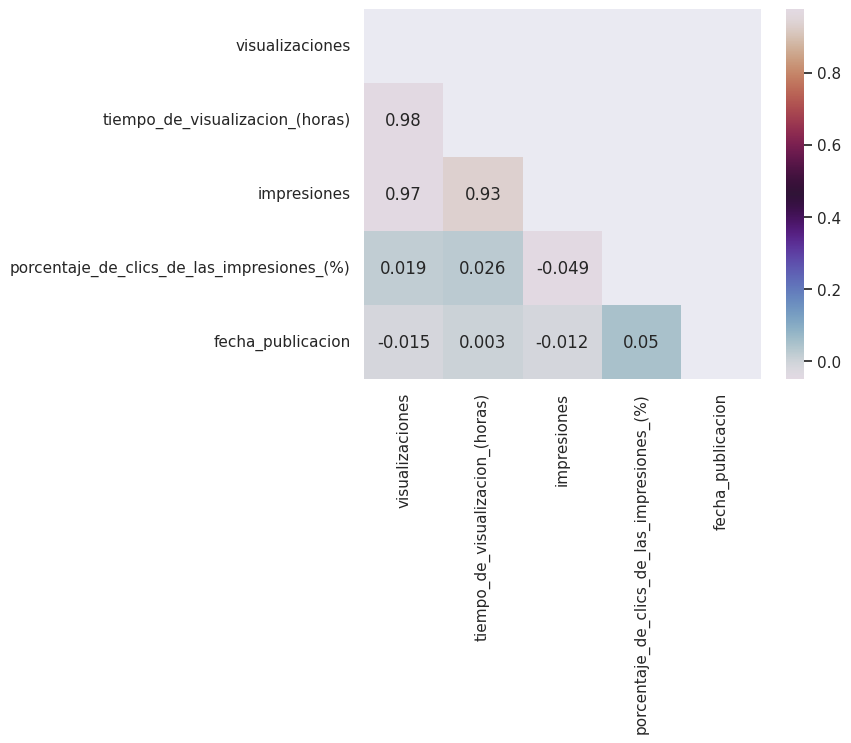

In [89]:
corr_df=df_data_tabla_fuente_trafico.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',square=False, alpha=1, mask=mask)
plt.show()


Preliminarmente no se observa una diferencia significativa en la cantidad de visualizaciones por fuente de tráfico

<AxesSubplot: xlabel='fuente_de_trafico', ylabel='count'>

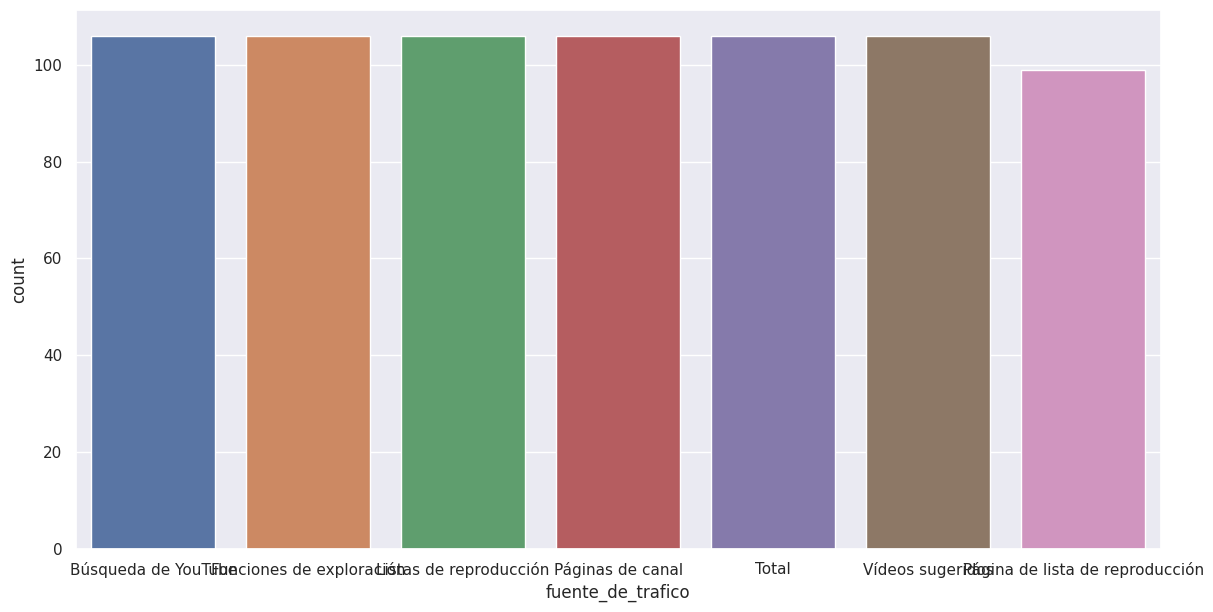

In [94]:
fig,ax=plt.subplots(figsize=(14,7))
sns.countplot(x='fuente_de_trafico',data=df_data_tabla_fuente_trafico,
order=df_data_tabla_fuente_trafico['fuente_de_trafico'].value_counts().index)

## df_data_tabla_sexo_espect

In [39]:
df_data_tabla_sexo_espect = df_dataset[['sexo_del_espectador', 'visualizaciones_(%)Sexo', 'duarcion_media_vis_sexo', 'tiempo_vis_(%)Sexo'
                , 'nombre_video', 'fecha_publicacion']]
df_data_tabla_sexo_espect = df_data_tabla_sexo_espect.dropna()

########### Rename ###########
df_data_tabla_sexo_espect.rename(columns = {'duarcion_media_vis_sexo': 'duracion_media_de_las_visualizaciones'
                , 'visualizaciones_(%)Sexo': 'visualizaciones_(%)'
                , 'tiempo_vis_(%)Sexo': 'tiempo_de_visualizacion_(horas)_(%)'}, inplace = True)

df_data_tabla_sexo_espect.head()
#

,sexo_del_espectador,visualizaciones_(%),duracion_media_de_las_visualizaciones,tiempo_de_visualizacion_(horas)_(%),nombre_video,fecha_publicacion
193,Hombre,100.0,0:02:47,100.0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902
579,Hombre,100.0,0:08:26,100.0,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525
772,Hombre,100.0,0:03:26,100.0,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427
965,Hombre,100.0,0:00:28,100.0,Puedes adivinar lo que es_ DelcaVideography #s...,20211122
1544,Hombre,100.0,0:03:36,100.0,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019


In [40]:
df_data_tabla_sexo_espect.describe()

,visualizaciones_(%),tiempo_de_visualizacion_(horas)_(%),fecha_publicacion
count,93.000000,93.000000,9.300000e+01
mean,91.397849,91.397849,2.021391e+07
std,25.694952,26.321231,4.397477e+03
min,1.110000,1.040000,2.021050e+07
25%,100.000000,100.000000,2.021081e+07
50%,100.000000,100.000000,2.021110e+07
75%,100.000000,100.000000,2.022013e+07
max,100.000000,100.000000,2.022043e+07


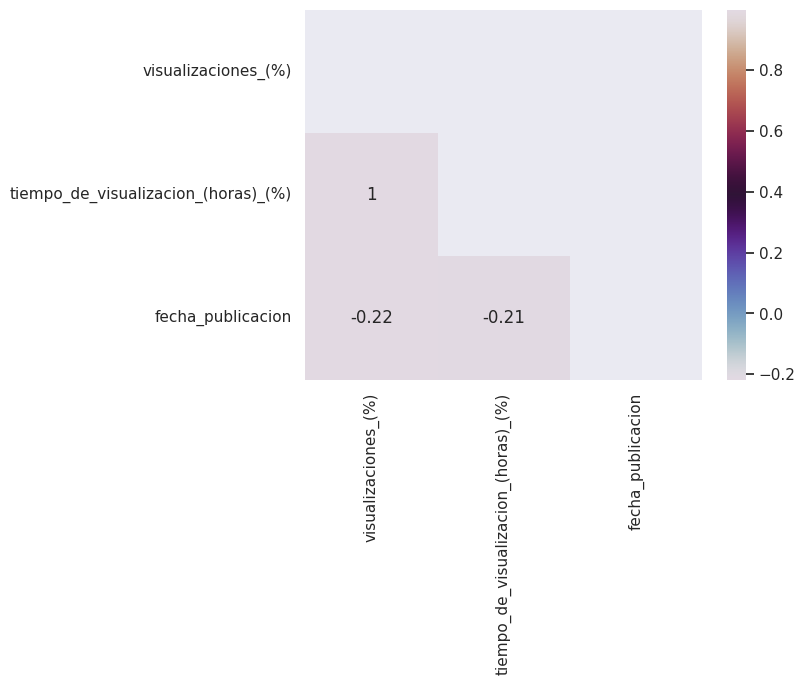

In [95]:
corr_df=df_data_tabla_sexo_espect.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',square=False, alpha=1, mask=mask)
plt.show()

Según la data a Posteriori, la mayor cantidad de tiempo de visualizaciones viene dada por público masculino.

In [96]:
DeepnoteChart(df_data_tabla_sexo_espect, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"sexo_del_espectador","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"tiempo_de_visualizacion_(horas)_(%)","scale":{"type":"linear"},"aggregate":"sum"}}}""")

## df_data_tabla_tipo_dispositivo

In [43]:
df_data_tabla_tipo_dispositivo = df_dataset[['tipo_de_dispositivo_TD', 'cnt_vis_TD', 'tiempo_vis_TD', 'duarcion_media_vis_TD'
                , 'nombre_video', 'fecha_publicacion']]
df_data_tabla_tipo_dispositivo = df_data_tabla_tipo_dispositivo.dropna()

########### Rename ###########
df_data_tabla_tipo_dispositivo.rename(columns = {'tipo_de_dispositivo_TD':'tipo_de_dispositivo', 'cnt_vis_TD':'visualizaciones', 
                'tiempo_vis_TD': 'tiempo_de_visualizacion_(horas)', 
                'duarcion_media_vis_TD': 'duracion_media_de_las_visualizaciones'}, inplace = True)

df_data_tabla_tipo_dispositivo.head()
#df_data_tabla_tipo_dispositivo.describe()

,tipo_de_dispositivo,visualizaciones,tiempo_de_visualizacion_(horas),duracion_media_de_las_visualizaciones,nombre_video,fecha_publicacion
0,Ordenador,121.0,1.2794,0:00:38,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
1,TV,23.0,0.2965,0:00:46,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
2,Tablet,17.0,0.1916,0:00:40,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
3,Teléfono móvil,464.0,4.5582,0:00:35,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722
4,Total,625.0,6.3257,0:00:36,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,20210722


In [44]:
df_data_tabla_tipo_dispositivo.describe()

,visualizaciones,tiempo_de_visualizacion_(horas),fecha_publicacion
count,530.000000,530.000000,5.300000e+02
mean,1642.239623,75.792387,2.021335e+07
std,8754.922547,306.523466,4.156678e+03
min,3.000000,0.009900,2.021050e+07
25%,70.250000,3.173475,2.021073e+07
50%,500.000000,16.326100,2.021097e+07
75%,1245.500000,65.938900,2.022012e+07
max,151522.000000,5615.866600,2.022043e+07


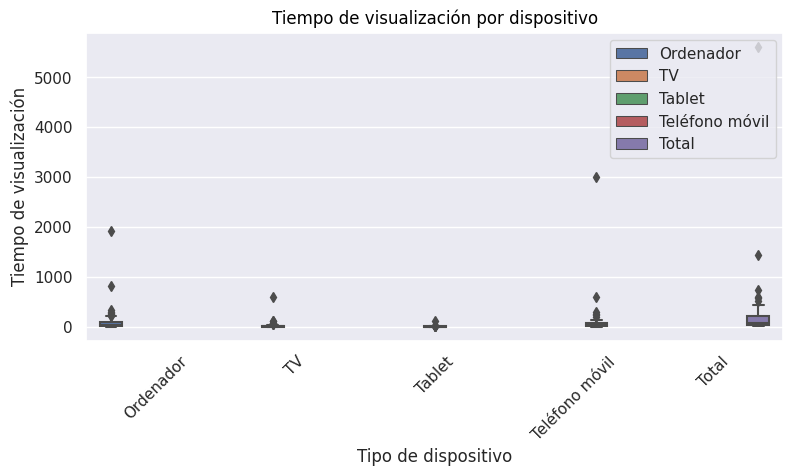

In [45]:
plt.figure(figsize = (9,4))
sns.boxplot(x = 'tipo_de_dispositivo',y = 'tiempo_de_visualizacion_(horas)', hue = 'tipo_de_dispositivo'
,data = df_data_tabla_tipo_dispositivo)
plt.xticks(rotation = 45)
plt.title('Tiempo de visualización por dispositivo', color = 'black')
plt.xlabel('Tipo de dispositivo')
plt.ylabel('Tiempo de visualización')
plt.legend(loc = 1)
plt.show()

Los videos son en su mayoría reproducidos en telefonos celulares y computadores.

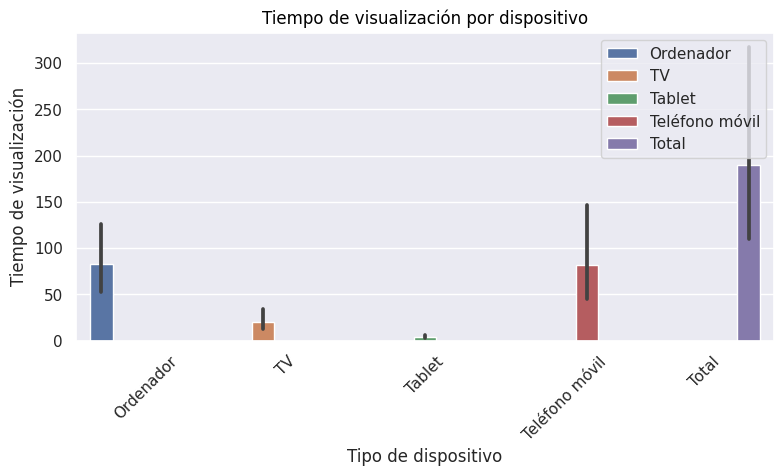

In [46]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'tipo_de_dispositivo',y = 'tiempo_de_visualizacion_(horas)', hue = 'tipo_de_dispositivo'
,data = df_data_tabla_tipo_dispositivo)
plt.xticks(rotation = 45)
plt.title('Tiempo de visualización por dispositivo', color = 'black')
plt.xlabel('Tipo de dispositivo')
plt.ylabel('Tiempo de visualización')
plt.legend(loc = 1)
plt.show()

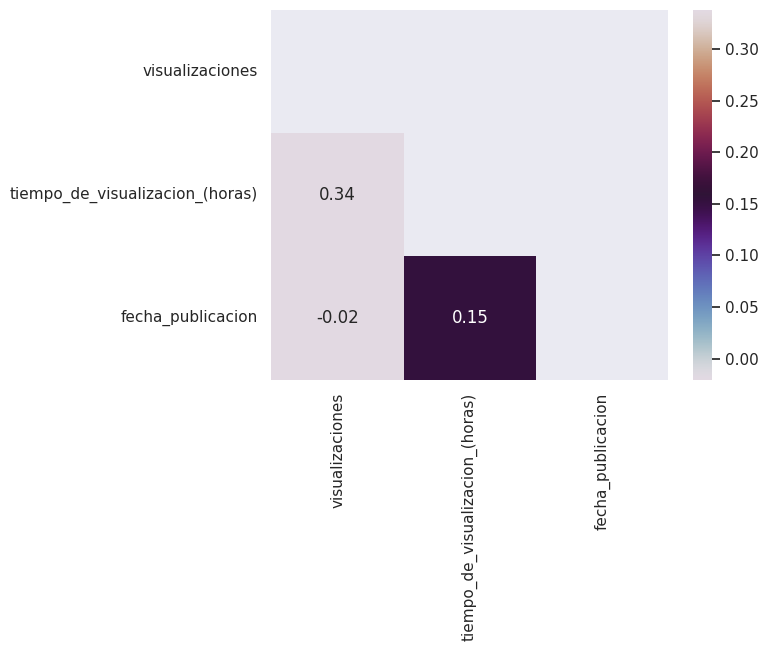

In [97]:
corr_df=df_data_tabla_tipo_dispositivo.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',square=False, alpha=1, mask=mask)
plt.show()

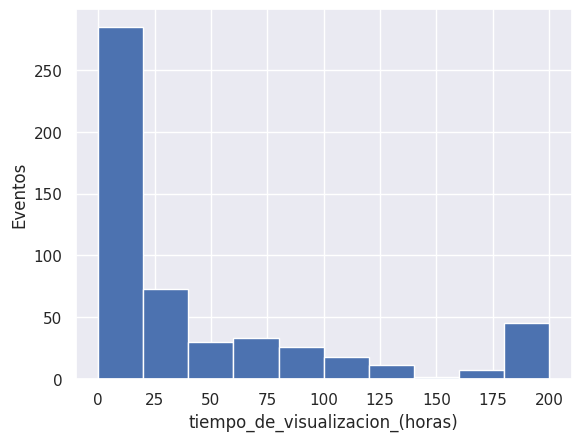

In [48]:
df_data_tabla_tipo_dispositivo['tiempo_de_visualizacion_(horas)'][df_data_tabla_tipo_dispositivo['tiempo_de_visualizacion_(horas)']>200]=200
plt.hist(df_data_tabla_tipo_dispositivo['tiempo_de_visualizacion_(horas)'],bins=10)
plt.xlabel("tiempo_de_visualizacion_(horas)")
plt.ylabel("Eventos")
plt.show()

# EDA datos_gráfico

En este formato de informe ofrecido por Youtube se presenta la misma información contenida en el formato de tabla. No agrega valor continuar con el análisis exploratorio de datos desde este punto en adelante.

## df_data_grafico_area_geogr

In [49]:
df_data_grafico_area_geogr = pd.read_csv('/work/data_consolidada/datos_grafico/df_data_grafico_area_geogr.csv')
df_data_grafico_area_geogr = df_data_grafico_area_geogr.dropna()
df_data_grafico_area_geogr.head()

,fecha,area_geografica,visualizaciones,fecha_publicacion,nombre_video
0,2021-07-28,AR,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
1,2021-07-29,AR,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
2,2021-07-30,AR,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
3,2021-07-31,AR,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
4,2021-08-01,AR,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...


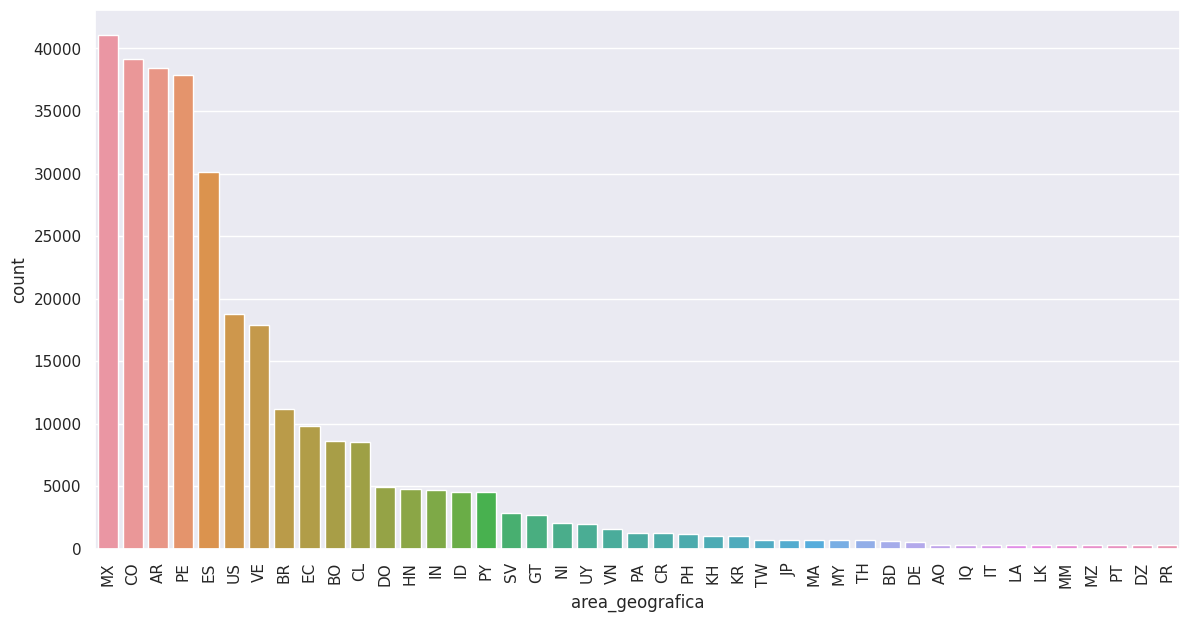

In [50]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x = 'area_geografica', data = df_data_grafico_area_geogr, 
order = df_data_grafico_area_geogr['area_geografica'].value_counts().index)

plt.xticks(rotation=90);

In [51]:
df_data_grafico_area_geogr.describe().round(3)

,visualizaciones,fecha_publicacion
count,309874.000,3.098740e+05
mean,0.782,2.021315e+07
std,11.374,4.009053e+03
min,0.000,2.021050e+07
25%,0.000,2.021080e+07
50%,0.000,2.021101e+07
75%,0.000,2.021122e+07
max,1207.000,2.022043e+07


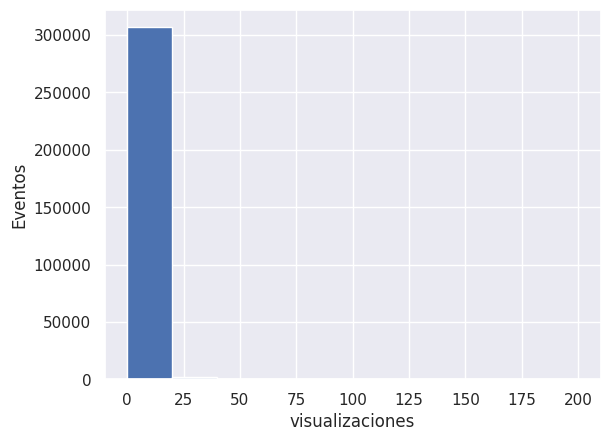

In [52]:
df_data_grafico_area_geogr['visualizaciones'][df_data_grafico_area_geogr['visualizaciones']>200]=200
plt.hist(df_data_grafico_area_geogr['visualizaciones'],bins=10)
plt.xlabel("visualizaciones")
plt.ylabel("Eventos")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

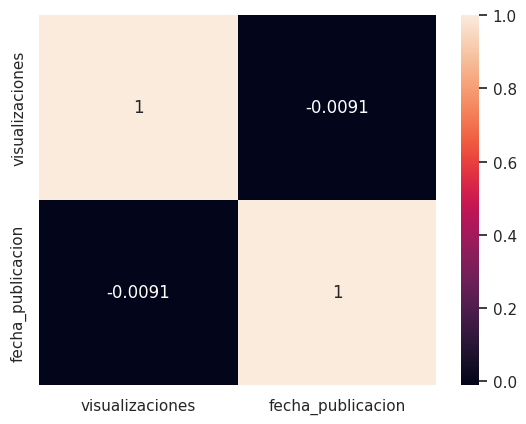

In [53]:
corr_df=df_data_grafico_area_geogr.corr(method='pearson')
sns.heatmap(corr_df,annot=True)
plt.show

## df_data_grafico_ciudades

In [54]:
df_data_grafico_ciudades= pd.read_csv('/work/data_consolidada/datos_grafico/df_data_grafico_ciudades.csv')
df_data_grafico_ciudades = df_data_grafico_ciudades.dropna()
df_data_grafico_ciudades.head()

,fecha,ciudades,nombre_de_la_ciudad,visualizaciones,fecha_publicacion,nombre_video
0,2021-07-28,0x85ce0026db097507:0x54061076265ee841,Ciudad de México,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
1,2021-07-29,0x85ce0026db097507:0x54061076265ee841,Ciudad de México,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
2,2021-07-30,0x85ce0026db097507:0x54061076265ee841,Ciudad de México,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
3,2021-07-31,0x85ce0026db097507:0x54061076265ee841,Ciudad de México,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
4,2021-08-01,0x85ce0026db097507:0x54061076265ee841,Ciudad de México,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...


In [55]:
df_data_grafico_ciudades.describe().round(3)

,visualizaciones,fecha_publicacion
count,96762.000,9.676200e+04
mean,0.374,2.021321e+07
std,4.874,4.001201e+03
min,0.000,2.021050e+07
25%,0.000,2.021091e+07
50%,0.000,2.021102e+07
75%,0.000,2.021122e+07
max,253.000,2.022043e+07


<function matplotlib.pyplot.show(close=None, block=None)>

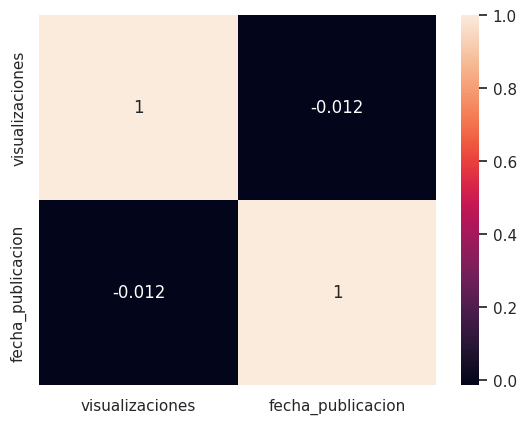

In [56]:
corr_df=df_data_grafico_ciudades.corr(method='pearson')
sns.heatmap(corr_df,annot=True)
plt.show

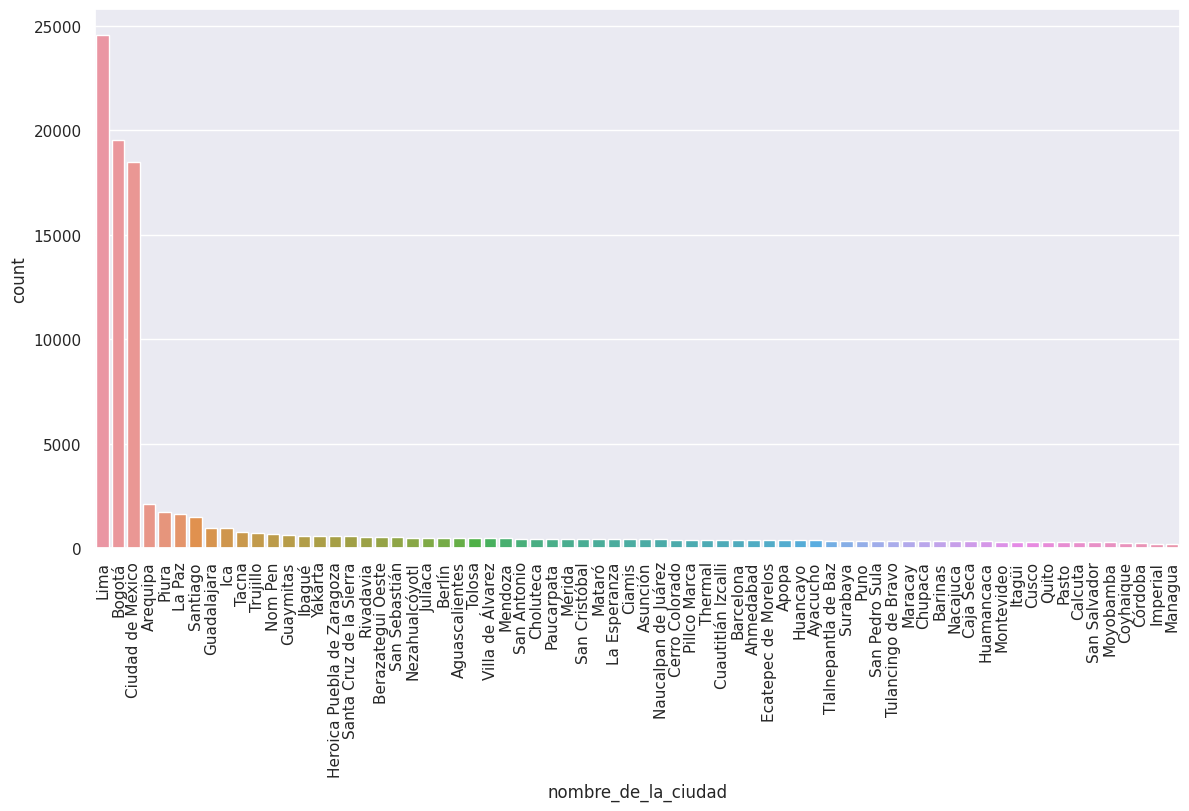

In [57]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x = 'nombre_de_la_ciudad', data = df_data_grafico_ciudades, 
order = df_data_grafico_ciudades['nombre_de_la_ciudad'].value_counts().index)
plt.xticks(rotation=90);

## df_data_grafico_estado_suscripcion

In [58]:
df_data_grafico_estado_suscripcion= pd.read_csv('/work/data_consolidada/datos_grafico/df_data_grafico_estado_suscripcion.csv')
df_data_grafico_estado_suscripcion = df_data_grafico_estado_suscripcion.dropna()
df_data_grafico_estado_suscripcion.head()

,fecha,estado_de_suscripcion,visualizaciones,fecha_publicacion,nombre_video
0,2021-07-28,Suscrito,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
1,2021-07-29,Suscrito,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
2,2021-07-30,Suscrito,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
3,2021-07-31,Suscrito,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
4,2021-08-01,Suscrito,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...


In [59]:
df_data_grafico_estado_suscripcion.describe().round(3)

,visualizaciones,fecha_publicacion
count,117956.000,1.179560e+05
mean,5.212,2.021250e+07
std,49.197,3.782705e+03
min,0.000,2.021022e+07
25%,0.000,2.021051e+07
50%,1.000,2.021080e+07
75%,2.000,2.021112e+07
max,3032.000,2.022083e+07


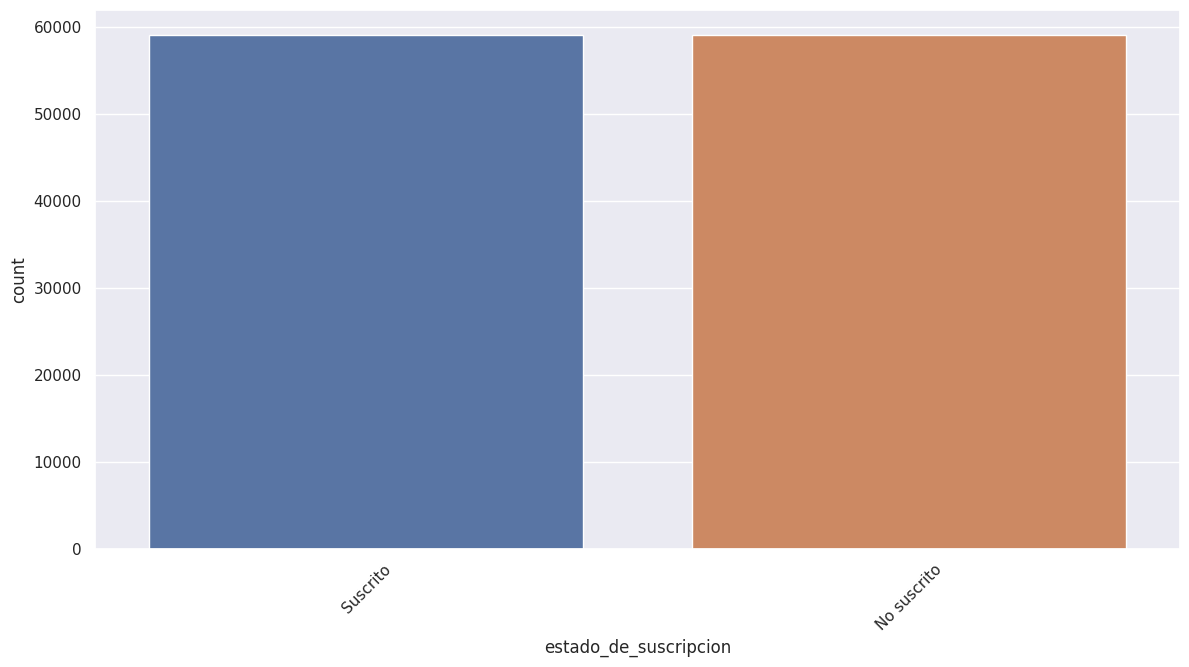

In [60]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x = 'estado_de_suscripcion', data = df_data_grafico_estado_suscripcion, 
order = df_data_grafico_estado_suscripcion['estado_de_suscripcion'].value_counts().index)
plt.xticks(rotation=45);

## df_data_grafico_fuente_trafico

In [61]:
df_data_grafico_fuente_trafico= pd.read_csv('/work/data_consolidada/datos_grafico/df_data_grafico_fuente_trafico.csv')
df_data_grafico_fuente_trafico = df_data_grafico_fuente_trafico.dropna()
df_data_grafico_fuente_trafico.head()

,fecha,fuente_de_trafico,visualizaciones,fecha_publicacion,nombre_video
0,2021-07-28,Directa o desconocida,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
1,2021-07-29,Directa o desconocida,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
2,2021-07-30,Directa o desconocida,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
3,2021-07-31,Directa o desconocida,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
4,2021-08-01,Directa o desconocida,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...


In [62]:
df_data_grafico_fuente_trafico.describe().round(3)

,visualizaciones,fecha_publicacion
count,464435.000,4.644350e+05
mean,0.937,2.021245e+07
std,22.890,3.559463e+03
min,0.000,2.021050e+07
25%,0.000,2.021072e+07
50%,0.000,2.021090e+07
75%,0.000,2.021112e+07
max,2985.000,2.022043e+07


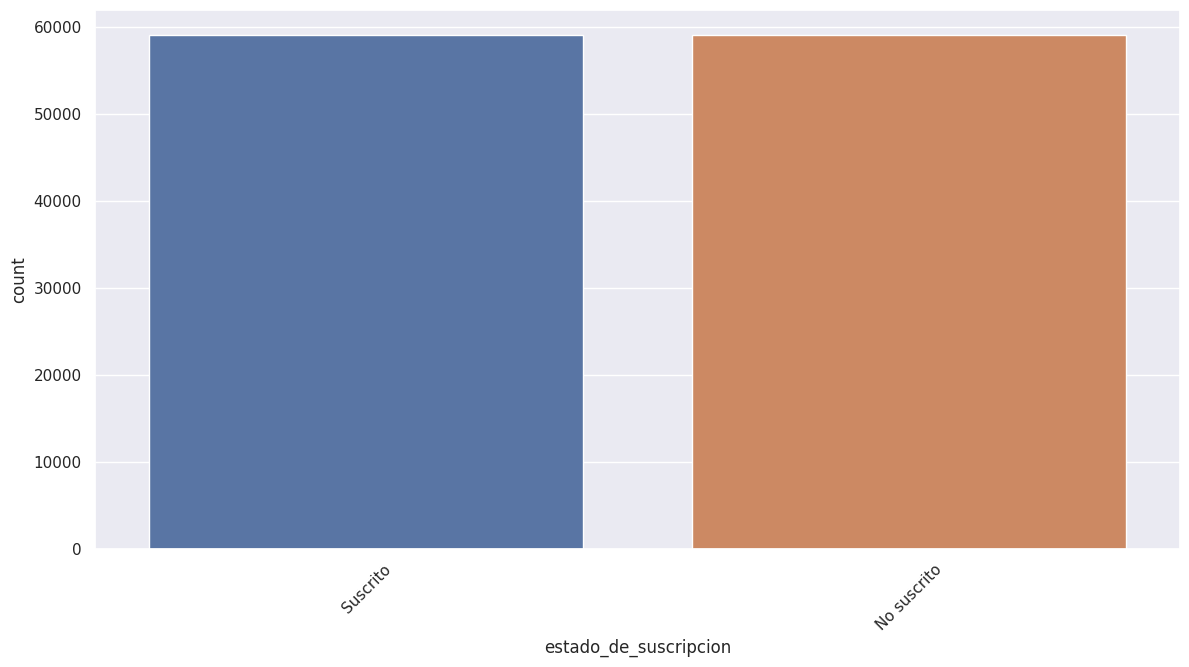

In [63]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x = 'estado_de_suscripcion', data = df_data_grafico_estado_suscripcion, 
order = df_data_grafico_estado_suscripcion['estado_de_suscripcion'].value_counts().index)
plt.xticks(rotation=45);

## df_data_grafico_tipo_dispositivo

In [64]:
df_data_grafico_tipo_dispositivo= pd.read_csv('/work/data_consolidada/datos_grafico/df_data_grafico_tipo_dispositivo.csv')
df_data_grafico_tipo_dispositivo = df_data_grafico_tipo_dispositivo.dropna()
df_data_grafico_tipo_dispositivo.head()

,fecha,tipo_de_dispositivo,visualizaciones,fecha_publicacion,nombre_video
0,2021-07-28,Ordenador,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
1,2021-07-29,Ordenador,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
2,2021-07-30,Ordenador,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
3,2021-07-31,Ordenador,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...
4,2021-08-01,Ordenador,0,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...


In [65]:
df_data_grafico_tipo_dispositivo.describe().round(3)

,visualizaciones,fecha_publicacion
count,166032.000,1.660320e+05
mean,2.621,2.021245e+07
std,34.364,3.560575e+03
min,0.000,2.021050e+07
25%,0.000,2.021072e+07
50%,0.000,2.021090e+07
75%,1.000,2.021112e+07
max,2445.000,2.022043e+07


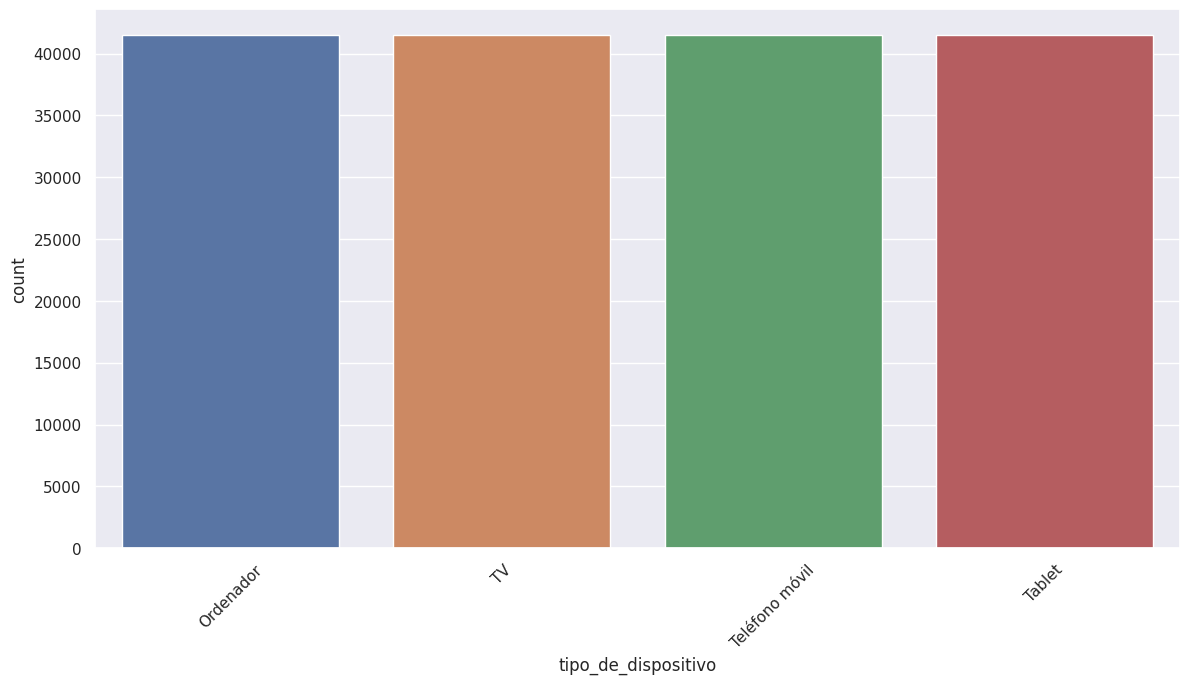

In [66]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x = 'tipo_de_dispositivo', data = df_data_grafico_tipo_dispositivo, 
order = df_data_grafico_tipo_dispositivo['tipo_de_dispositivo'].value_counts().index)
plt.xticks(rotation=45);

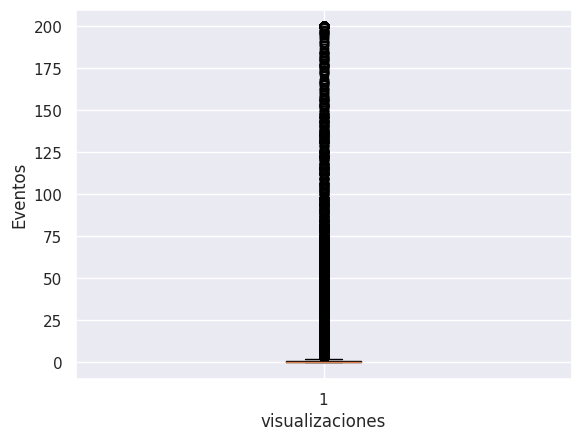

In [67]:
df_data_grafico_tipo_dispositivo['visualizaciones'][df_data_grafico_tipo_dispositivo['visualizaciones']>200]=200
plt.boxplot(df_data_grafico_tipo_dispositivo['visualizaciones'])
plt.xlabel("visualizaciones")
plt.ylabel("Eventos")
plt.show()

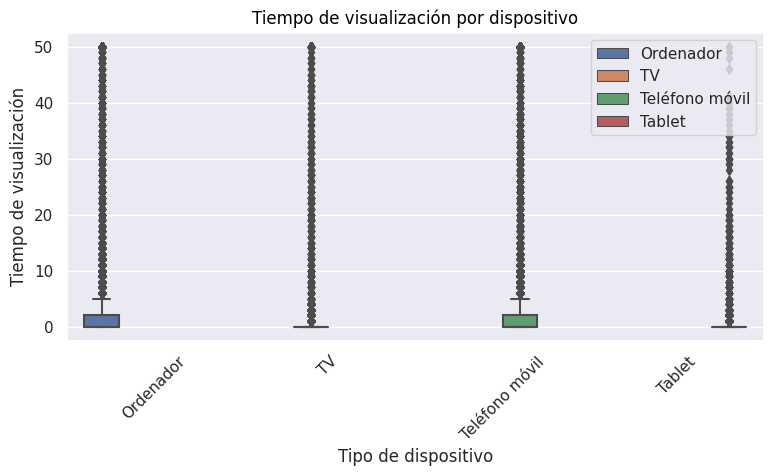

In [68]:
df_data_grafico_tipo_dispositivo['visualizaciones'][df_data_grafico_tipo_dispositivo['visualizaciones']>50]=50
plt.figure(figsize = (9,4))
sns.boxplot(x = 'tipo_de_dispositivo',y = 'visualizaciones', hue = 'tipo_de_dispositivo'
,data = df_data_grafico_tipo_dispositivo)
plt.xticks(rotation = 45)
plt.title('Tiempo de visualización por dispositivo', color = 'black')
plt.xlabel('Tipo de dispositivo')
plt.ylabel('Tiempo de visualización')
plt.legend(loc = 1)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7377d29e-ada8-4781-9a6b-60a54a1f06a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>